<a href="https://colab.research.google.com/github/ToddWi/MachineLearning/blob/main/ml03_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets # 예제 데이터셋들과 데이터셋 로딩 함수들을 가지고 있는 모듈.
from sklearn.model_selection import train_test_split # 훈련-테스트-분리
from sklearn.preprocessing import StandardScaler # 전처리 - 특성 스케일 변환
from sklearn.neighbors import KNeighborsClassifier # ML model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
iris = datasets.load_iris()

In [ ]:
type(iris)
#> Bunch 클래스 객체 - 파이썬의 dict와 비슷한 타입. key-value 쌍으로 아이템이 저장.

sklearn.utils._bunch.Bunch

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(iris['DESCR']) # iris 데이터셋 설명

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris.data # iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
X = iris.data # iris['data']
#> 특성 배열(sepal-length, sepal-width, petal-length, petal-width)

In [ ]:
X.shape #> (150, 4) = (n_samples, n_features)

(150, 4)

In [ ]:
iris.feature_names # 특성들의 이름, 컬럼 이름

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
y = iris.target # 타겟 배열, 레이블.
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
y.shape # (150,) = (n_samples,)

(150,)

In [ ]:
iris.target_names # 타겟의 이름들(레이블)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# 데이터 탐색

In [ ]:
df, target = datasets.load_iris(return_X_y=True, as_frame=True)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
type(target)

pandas.core.series.Series

In [ ]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
# DataFrame에 컬럼(변수) 추가 - 붓꽃의 품종을 컬럼으로 추가
df['species'] = target

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
for n in range(3):
    df.loc[df.species == n, 'species'] = iris.target_names[n]

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.species.value_counts() # 데이터프레임에서 카테고리 타입의 빈도수

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [ ]:
df.corr(numeric_only=True) # 상관 관계 - pearson 상관계수

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


# 훈련셋, 테스트셋 나누기

특성 배열(X)과 타겟 배열(y)을 훈련(80%),테스트(20%)비율로 층화추출

In [ ]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
y = df['species'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [ ]:
scaler = StandardScaler()

In [ ]:
X_tr_scaled = scaler.fit_transform(X_train)

In [ ]:
X_te_scaled = scaler.transform(X_test)

# 특성 스케일 변환 - StandardScaler

# KNN 모델 생성, 훈련, 평가

* k값의 변화에 따른 훈련 셋의 정확도, 테스트 셋의 정확도

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_tr_scaled, y_train)

KNeighborsClassifier()

In [ ]:
y_tr_pred = knn.predict(X_tr_scaled)
y_tr_pred

array(['virginica', 'setosa', 'virginica', 'versicolor', 'virginica',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'virginica',
       'setosa', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicol

In [ ]:
accuracy_score(y_train, y_tr_pred)

0.9583333333333334

In [ ]:
knn.fit(X_te_scaled, y_test)

KNeighborsClassifier()

In [ ]:
y_te_pred = knn.predict(X_te_scaled)
y_te_pred

array(['versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'virginica', 'virginica', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa'], dtype=object)

In [ ]:
accuracy_score(y_test, y_te_pred)

0.9666666666666667

In [ ]:
confusion_matrix(y_train, y_tr_pred)

array([[40,  0,  0],
       [ 0, 39,  1],
       [ 0,  4, 36]])

In [ ]:
report = classification_report(y_train, y_tr_pred)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.91      0.97      0.94        40
   virginica       0.97      0.90      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [ ]:
accuracy_score(y_train, y_tr_pred)

0.875

테스트 셋 평가

In [ ]:
y_te_pred = knn.predict(X_te_scaled) # 테스트 셋 예측값

In [ ]:
accuracy_score(y_test,y_te_pred)

0.9666666666666667

In [ ]:
confusion_matrix(y_test, y_te_pred)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

k값(가장 가까운 이웃 개수) 변화에 따른 모델 성능 평가

In [ ]:
k_vals = np.arange(1, 51) # 가장 가까운 이웃의 개수(KNN에서 k값)
train_scores = [] # 주어진 k값에서 훈련 셋의 정확도를 저장하기 위한 리스트
test_scores = [] # 주어진 k값에서 테스트 셋의 정확도를 저장하기 위한 리스트

for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_tr_scaled, y_train)
    y_tr_pred = knn.predict(X_tr_scaled) # 훈련 셋의 예측값
    tr_acc = accuracy_score(y_train, y_tr_pred) # 훈련 셋의 정확도
    train_scores.append(tr_acc) # 훈련 셋 평가 점수 리스트에 추가
    y_te_pred = knn.predict(X_te_scaled) # 테스트 셋의 예측값
    te_acc = accuracy_score(y_test, y_te_pred) # 테스트 셋의 정확도
    test_scores.append(te_acc) # 테스트 셋 평가 점수 리스트에 추가

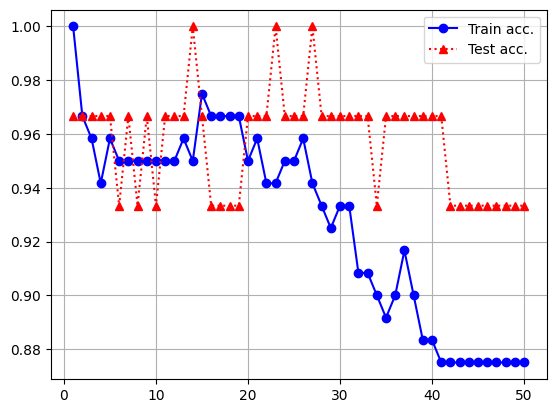

In [ ]:
# 주어진 k값에 따른 훈련 셋의 정확도 변화 시각화
plt.plot(k_vals, train_scores, 'bo-', label='Train acc.')

# 주어진 k값에 따른 테스트 셋의 정확도 변화 시각화
plt.plot(k_vals, test_scores, 'r^:', label='Test acc.') # r=red, ^=삼각형, : =선 모양

plt.legend()
plt.grid()

plt.show()

좋은 머신 러닝 모델이란 훈련 셋의 정확도와 테스트 셋의 정확도의 차이가 적은 모델

* overfitting(과대적합): 훈련 셋의 정확도는 매우 높은데 비해, 테스트 셋의 정확도가 너무 낮은 경우.
* underfitting(과소적합): 훈련 셋의 정확도보다 테스트 셋의 정확도 더 좋은 경우.